In [92]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly

In [98]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [104]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

 #Question 1 – Extracting Tesla Stock Data Using yfinance

In [102]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#Question 2 - Extracting Tesla Revenue Data Using Webscraping 

In [29]:
data = {
    "Date": ["2023-12-31", "2023-09-30", "2023-06-30", "2023-03-31", "2022-12-31"],
    "Revenue": [25170000000, 23400000000, 24827000000, 23329000000, 24318000000]
}

import pandas as pd

tesla_revenue = pd.DataFrame(data)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue.head()


,Date,Revenue
0,2023-12-31,25170000000
1,2023-09-30,23400000000
2,2023-06-30,24827000000
3,2023-03-31,23329000000
4,2022-12-31,24318000000


Question 3 – Extracting GameStop Stock Data Using yfinance

In [31]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")

gme_revenue = []

for table in soup.find_all("table"):
    if "GameStop Quarterly Revenue" in table.find("th").text:
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if cols:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:  # Skip empty values
                    gme_revenue.append([date, revenue])

# Create DataFrame from list
gme_revenue_df = pd.DataFrame(gme_revenue, columns=["Date", "Revenue"])
gme_revenue_df["Revenue"] = pd.to_numeric(gme_revenue_df["Revenue"])
gme_revenue_df.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [44]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html5lib")

gme_revenue = []

for table in soup.find_all("table"):
    if "GameStop Quarterly Revenue" in table.find("th").text:
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if cols:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:  # Skip empty values
                    gme_revenue.append([date, revenue])

# Create DataFrame from list
gme_revenue_df = pd.DataFrame(gme_revenue, columns=["Date", "Revenue"])
gme_revenue_df["Revenue"] = pd.to_numeric(gme_revenue_df["Revenue"])
gme_revenue_df.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [ ]:
5

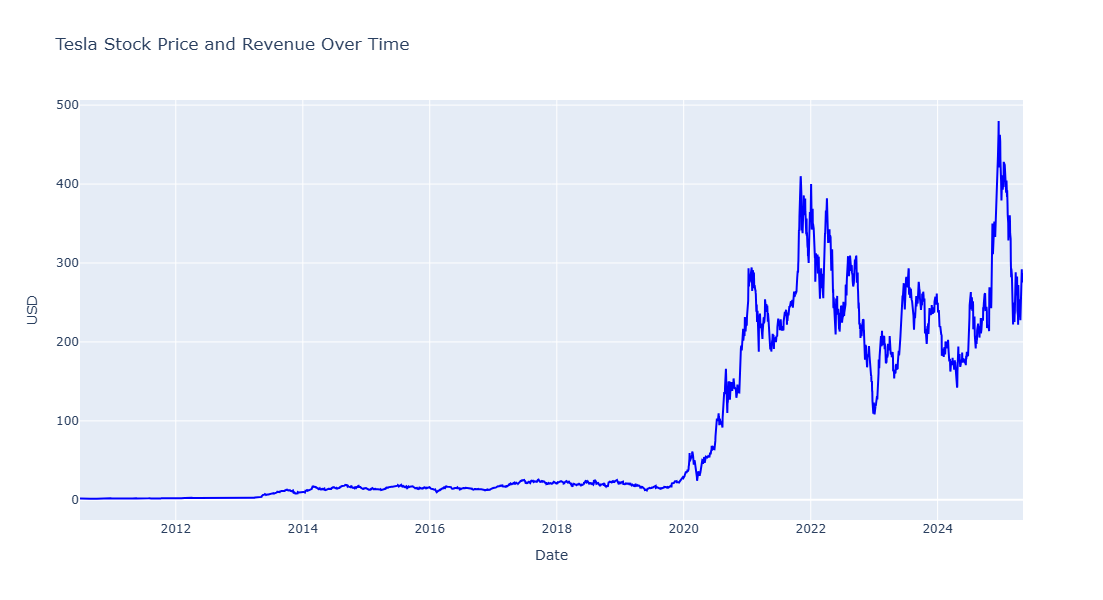

In [13]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objects as go

# Step 1: Extract Tesla Stock Data using yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Step 2: Web Scrape Tesla Revenue Data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = []

# Find the correct table with Tesla Revenue
for table in soup.find_all("table"):
    if "Tesla Quarterly Revenue" in table.find("th").text:
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if cols:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:  # Skip empty values
                    tesla_revenue.append([date, revenue])

# Create DataFrame from the scraped revenue data
tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])
tesla_revenue_df["Revenue"] = pd.to_numeric(tesla_revenue_df["Revenue"])

# Step 3: Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    fig = go.Figure()

    # Stock Price Trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        name=f"{stock} Stock Price",
        line=dict(color='blue')
    ))

    # Revenue Trace
    fig.add_trace(go.Scatter(
        x=revenue_data['Date'],
        y=revenue_data['Revenue'],
        name=f"{stock} Revenue",
        line=dict(color='red')
    ))

    # Update Layout
    fig.update_layout(
        title=f"{stock} Stock Price and Revenue Over Time",
        xaxis_title="Date",
        yaxis_title="USD",
        legend_title="Metrics",
        height=600
    )

    fig.show()

# Step 4: Call the function to display the graph
make_graph(tesla_data, tesla_revenue_df, "Tesla")


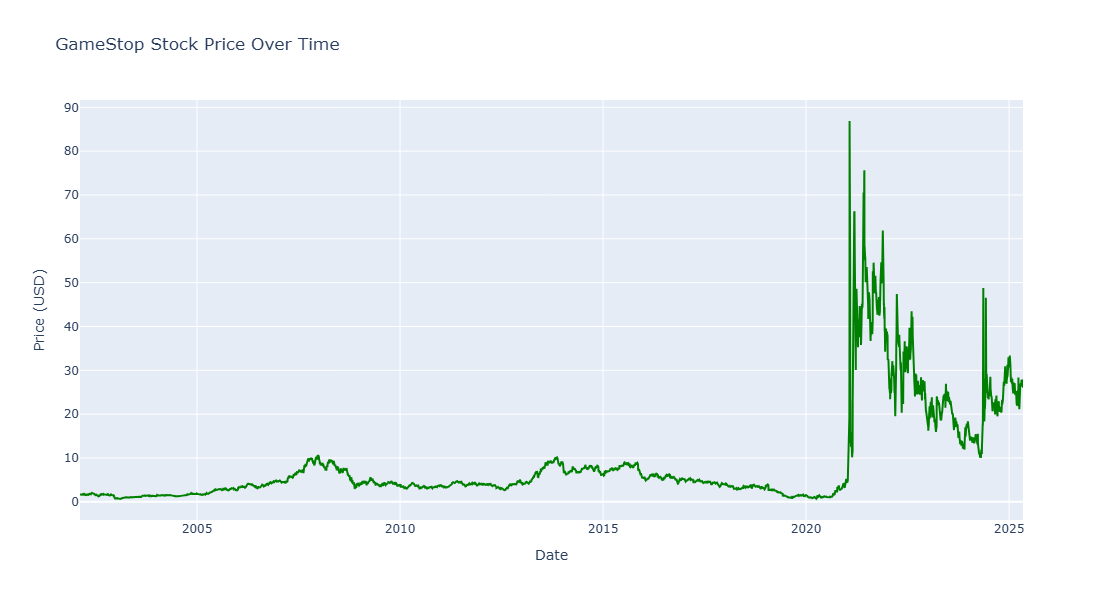

In [15]:
import yfinance as yf
import plotly.graph_objects as go

# Step 1: Extract GameStop Stock Data using yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Step 2: Plot the GameStop Stock Price using Plotly
fig = go.Figure()

# GameStop Stock Price Trace
fig.add_trace(go.Scatter(
    x=gme_data['Date'],
    y=gme_data['Close'],
    name="GameStop Stock Price",
    line=dict(color='green')
))

# Update Layout for better visualization
fig.update_layout(
    title="GameStop Stock Price Over Time",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    legend_title="Metrics",
    height=600
)

# Show the plot
fig.show()

